In [ ]:
%pip install qiskit
%pip install qiskit_algorithms
%pip install qiskit_finance
%pip install pylatexenc
%pip install qiskit_ibm_runtime
%pip install qiskit_aer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.1/307.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 kB 33.9 MB/s eta 0:

In [ ]:
# doing the basic imports

import numpy as np
import math
import matplotlib.pyplot as plt




# quantum imports

from qiskit import *                    # getting all the necessary qiskit packages

from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.visualization import *      # visualization tools
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import IntegerComparator,TwoLocal
from qiskit.circuit.library.arithmetic import LinearAmplitudeFunction, CDKMRippleCarryAdder
from qiskit.circuit.library import RealAmplitudes

simulator = BasicAer.get_backend('qasm_simulator')  # setting the backend
from qiskit_algorithms import IterativeAmplitudeEstimation, EstimationProblem
from qiskit_algorithms.optimizers import optimizer, ADAM,GradientDescent, SPSA, COBYLA, GSLS, SLSQP, AQGD, NELDER_MEAD, POWELL


from qiskit_finance.applications.estimation import EuropeanCallPricing
from qiskit_finance.circuit.library import NormalDistribution
from qiskit.circuit.library import RYGate
from qiskit_aer.primitives import Sampler
from qiskit.quantum_info import Statevector
#from qiskit_aer.primitives import Sampler
from qiskit.utils import QuantumInstance, algorithm_globals

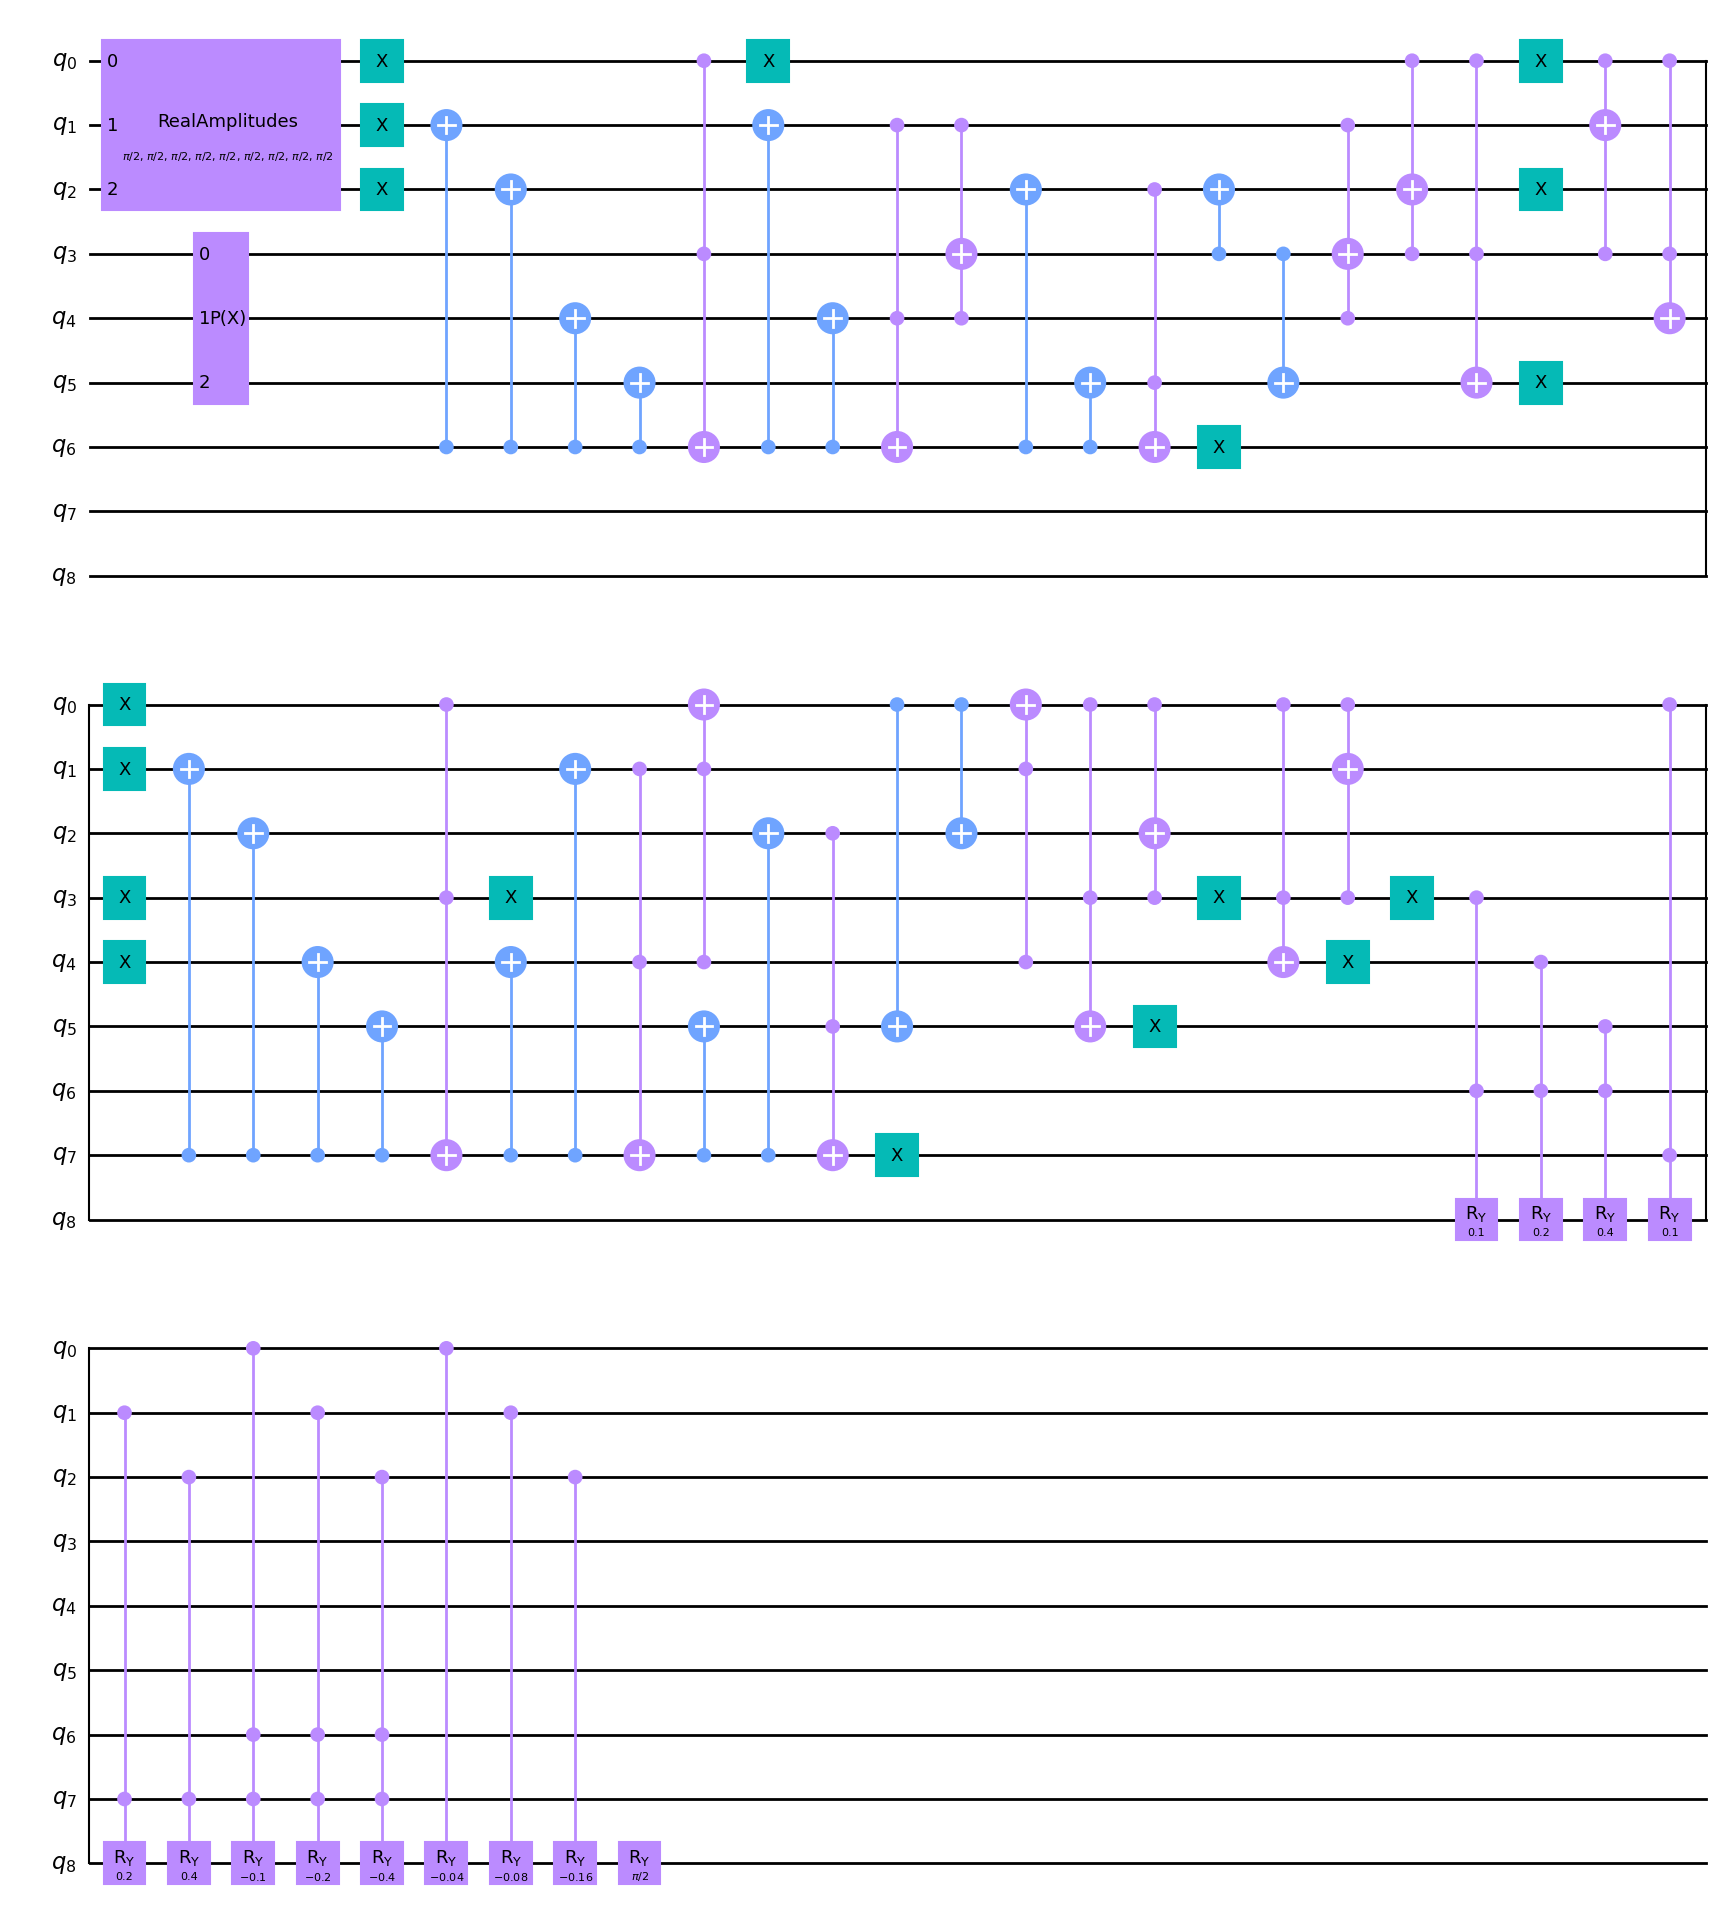

In [ ]:
n = 3
obj = 8
mu = 4
c = 0.1
sigma = 1
a = 0
b = 7
reps = 2
p_s = 0.5
p_b = 0.2
parameters = [np.pi/2] * n * (reps+1)
demand = NormalDistribution(num_qubits=n,mu=mu,sigma=sigma,  bounds=[a,b])
supply = RealAmplitudes(n, reps=reps)
supply = supply.assign_parameters(parameters)
qc = QuantumCircuit(9)
qc.compose(demand,qubits=[3,4,5], inplace=True)
qc.compose(supply, qubits = [0,1,2], inplace=True)
z = 6
z1 = 7
for i in range(n):
    qc.x(i)

for i in range(1,n):
    qc.cnot(z,i)

for i in range(1,n):
    qc.cnot(z,i+n)

qc.ccx(0,n,n+n)

qc.x(0)

for i in range(1,n-1):
  qc.cnot(n+n,i)
  qc.cnot(n+n,i+n)
  qc.ccx(i+n,i,n+n)
  qc.ccx(i+n,i,n)

qc.cnot(n+n,n-1)
qc.cnot(n+n,n+n-1)
qc.ccx(n+n-1,n-1,n+n)

for i in range(1,n-1):
    qc.cnot(n,n-i)
    qc.cnot(n,2*n-i)
    qc.ccx(2*n-i-1,n-i-1,n)

for i in range(1,n-1):
    qc.ccx(0,n,n-i)
    qc.ccx(0,n,2*n-i)

qc.x(0)

qc.ccx(0,n,1)

qc.ccx(0,n,n+1)

for i in range(n):
  qc.x(i)

qc.x(2*n)

for i in range(n):
    qc.x(i+n)

for i in range(1,n):
    qc.cnot(z1,i)

for i in range(1,n):
    qc.cnot(z1,i+n)

qc.ccx(0,n,z1)

qc.x(n)

for i in range(1,n-1):
  qc.cnot(z1,i+n)
  qc.cnot(z1,i)
  qc.ccx(i,i+n,z1)
  qc.ccx(i,i+n,0)

qc.cnot(z1,z1-2)
qc.cnot(z1,n-1)
qc.ccx(z1-2,n-1,z1)

for i in range(1,n-1):
    qc.cnot(0,z1-(i+1))
    qc.cnot(0,n-i)
    qc.ccx(z1-i-2,n-i-1,0)

for i in range(1,n-1):
    qc.ccx(0,n,z1-(i+1))
    qc.ccx(0,n,n-i)

qc.x(n)
qc.ccx(0,n,n+1)
qc.ccx(0,n,1)

for i in range(n):
    qc.x(n+i)
qc.x(z1)

for i in range(n):
    c2ry = RYGate(2*c*p_s * 2**(i)).control(2)
    qc.append(c2ry,[i+n,obj-2,obj])

for i in range(n):
    c2ry = RYGate(2*c*p_s * 2**(i)).control(2)
    qc.append(c2ry,[i,obj-1,obj])

for i in range(n):
    c2ry = RYGate(-2*c*p_s * 2**(i)).control(3)
    qc.append(c2ry,[i,obj-1,obj-2,obj])

for i in range(n):
  qc.cry(-2*c*p_b*(2**i),i,obj)

qc.ry(np.pi/2,obj)
qc.draw('mpl')


In [ ]:

epsilon = 0.01   # the error
alpha = 0.5      # the alpha value
num_shots = 2000

problem = EstimationProblem(state_preparation=qc,objective_qubits=[obj])     # the quantum circuit

# construct amplitude estimation
iae = IterativeAmplitudeEstimation(
    epsilon_target=epsilon,
    alpha=alpha,
    sampler=Sampler(run_options={"shots": num_shots})
)

In [ ]:
result = iae.estimate(problem)
print(result)
print((result.estimation-0.5)/c)

{   'alpha': 0.5,
    'circuit_results': None,
    'confidence_interval': (0.5621545352240744, 0.5637735388273977),
    'confidence_interval_processed': (0.5621545352240744, 0.5637735388273977),
    'epsilon_estimated': 0.0008095018016616162,
    'epsilon_estimated_processed': 0.0008095018016616162,
    'epsilon_target': None,
    'estimate_intervals': [   [0.0, 1.0],
                              [0.5532311457990847, 0.593582249104318],
                              [0.5621545352240744, 0.5637735388273977]],
    'estimation': 0.562964037025736,
    'estimation_processed': 0.562964037025736,
    'num_oracle_queries': 24000,
    'powers': [0, 0, 12],
    'ratios': [1.0, 25.0],
    'shots': None,
    'theta_intervals': [   [0, 0.25],
                           [0.13348808607965668, 0.13998243554929465],
                           [0.13491785726786065, 0.13517759750896177]]}
0.6296403702573605


In [ ]:
# loading the account

import numpy as np
from qiskit import *
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
# Save an IBM Quantum account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="Enter API Token Herem",overwrite=True)



# doing the basic imports
import math
import matplotlib.pyplot as plt





from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.visualization import *      # visualization tools
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import IntegerComparator,TwoLocal
from qiskit.circuit.library.arithmetic import LinearAmplitudeFunction, CDKMRippleCarryAdder
from qiskit.circuit.library import RealAmplitudes

simulator = BasicAer.get_backend('qasm_simulator')  # setting the backend
from qiskit_algorithms import IterativeAmplitudeEstimation, EstimationProblem
from qiskit_algorithms.optimizers import optimizer, ADAM,GradientDescent, SPSA, COBYLA, GSLS, SLSQP, AQGD, NELDER_MEAD, POWELL



from qiskit_finance.circuit.library import NormalDistribution
from qiskit.circuit.library import RYGate, XGate

from qiskit.quantum_info import Statevector
from qiskit.utils import QuantumInstance, algorithm_globals

from qiskit.transpiler import PassManager, InstructionDurations
from qiskit.transpiler.passes import ALAPSchedule, DynamicalDecoupling
from qiskit.visualization import timeline_drawer
service = QiskitRuntimeService(channel='ibm_quantum')

#service = QiskitRuntimeService()


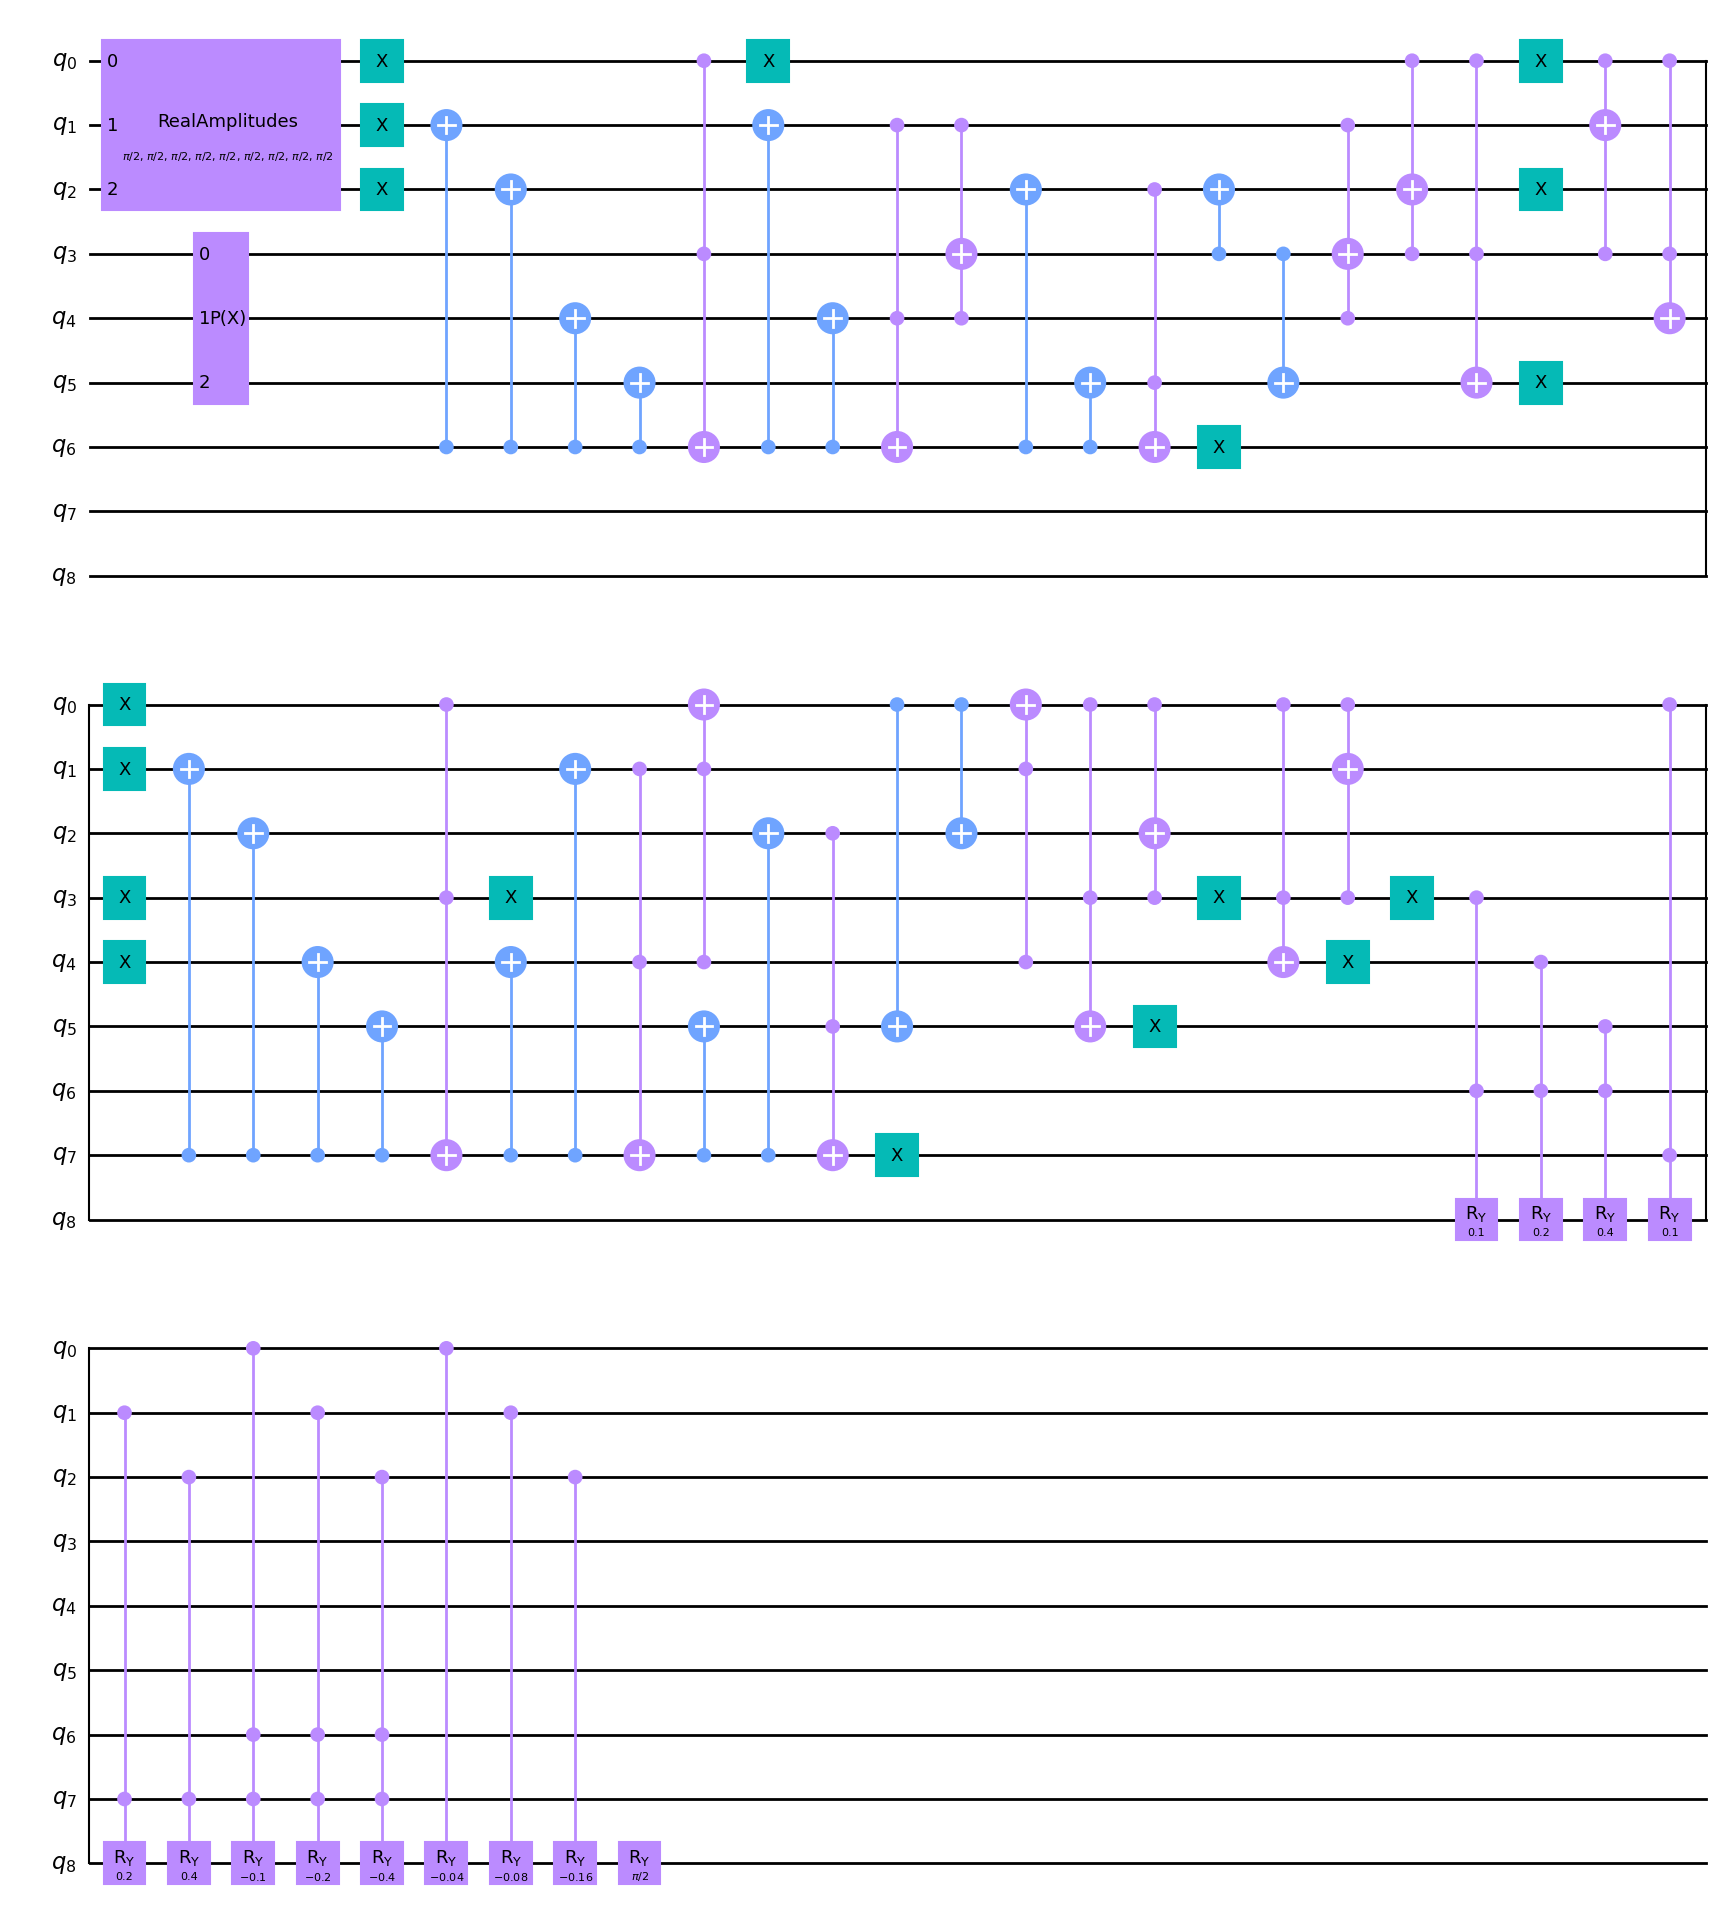

In [ ]:
n = 3
obj = 8
mu = 4
c = 0.1
sigma = 1
a = 0
b = 7
reps = 2
p_s = 0.5
p_b = 0.2
demand = NormalDistribution(num_qubits=n,mu=mu,sigma=sigma,  bounds=[a,b])
supply = RealAmplitudes(n, reps=reps)
supply = supply.assign_parameters(parameters)
qc = QuantumCircuit(9)
qc.compose(demand,qubits=[3,4,5], inplace=True)
qc.compose(supply, qubits = [0,1,2], inplace=True)
z = 6
z1 = 7
for i in range(n):
    qc.x(i)

for i in range(1,n):
    qc.cnot(z,i)

for i in range(1,n):
    qc.cnot(z,i+n)

qc.ccx(0,n,n+n)

qc.x(0)

for i in range(1,n-1):
  qc.cnot(n+n,i)
  qc.cnot(n+n,i+n)
  qc.ccx(i+n,i,n+n)
  qc.ccx(i+n,i,n)

qc.cnot(n+n,n-1)
qc.cnot(n+n,n+n-1)
qc.ccx(n+n-1,n-1,n+n)

for i in range(1,n-1):
    qc.cnot(n,n-i)
    qc.cnot(n,2*n-i)
    qc.ccx(2*n-i-1,n-i-1,n)

for i in range(1,n-1):
    qc.ccx(0,n,n-i)
    qc.ccx(0,n,2*n-i)

qc.x(0)

qc.ccx(0,n,1)

qc.ccx(0,n,n+1)

for i in range(n):
  qc.x(i)

qc.x(2*n)

for i in range(n):
    qc.x(i+n)

for i in range(1,n):
    qc.cnot(z1,i)

for i in range(1,n):
    qc.cnot(z1,i+n)

qc.ccx(0,n,z1)

qc.x(n)

for i in range(1,n-1):
  qc.cnot(z1,i+n)
  qc.cnot(z1,i)
  qc.ccx(i,i+n,z1)
  qc.ccx(i,i+n,0)

qc.cnot(z1,z1-2)
qc.cnot(z1,n-1)
qc.ccx(z1-2,n-1,z1)

for i in range(1,n-1):
    qc.cnot(0,z1-(i+1))
    qc.cnot(0,n-i)
    qc.ccx(z1-i-2,n-i-1,0)

for i in range(1,n-1):
    qc.ccx(0,n,z1-(i+1))
    qc.ccx(0,n,n-i)

qc.x(n)
qc.ccx(0,n,n+1)
qc.ccx(0,n,1)

for i in range(n):
    qc.x(n+i)
qc.x(z1)

for i in range(n):
    c2ry = RYGate(2*c*p_s * 2**(i)).control(2)
    qc.append(c2ry,[i+n,obj-2,obj])

for i in range(n):
    c2ry = RYGate(2*c*p_s * 2**(i)).control(2)
    qc.append(c2ry,[i,obj-1,obj])

for i in range(n):
    c2ry = RYGate(-2*c*p_s * 2**(i)).control(3)
    qc.append(c2ry,[i,obj-1,obj-2,obj])

for i in range(n):
  qc.cry(-2*c*p_b*(2**i),i,obj)

qc.ry(np.pi/2,obj)
qc.draw('mpl')

In [ ]:
backend = "ibmq_qasm_simulator"

In [ ]:
options = Options()

options.execution.shots = 2000
#options.seed_simulator = 120
options.optimization_level = 0

options.resilience_level = 0

In [ ]:
options = Options()

options.execution.shots = 2000
#options.seed_simulator = 120
options.optimization_level = 0

options.resilience_level = 0

In [ ]:
# runt he circuit on sampler

epsilon = 0.01   # the error
alpha = 0.5



with Session(service=service, backend=backend):
    sampler = Sampler(options = options)
    iae = IterativeAmplitudeEstimation(epsilon_target=epsilon,alpha=alpha, sampler=sampler)
    problem = EstimationProblem(state_preparation=qc,objective_qubits=[obj])
    result = iae.estimate(problem)
    print(result)
    print((result.estimation-0.5)/c)


{   'alpha': 0.5,
    'circuit_results': None,
    'confidence_interval': (0.5190774975898786, 0.5202981860852179),
    'confidence_interval_processed': (0.5190774975898786, 0.5202981860852179),
    'epsilon_estimated': 0.0006103442476696475,
    'epsilon_estimated_processed': 0.0006103442476696475,
    'epsilon_target': None,
    'estimate_intervals': [   [0.0, 1.0],
                              [0.48110392263332596, 0.5218922697557958],
                              [0.5190774975898786, 0.5202981860852179]],
    'estimation': 0.5196878418375483,
    'estimation_processed': 0.5196878418375483,
    'num_oracle_queries': 34000,
    'powers': [0, 0, 17],
    'ratios': [1.0, 35.0],
    'shots': None,
    'theta_intervals': [   [0, 0.25],
                           [0.121991879535583, 0.1284853771805353],
                           [0.12803701523040822, 0.1282314446714592]]}
0.19687841837548348
